**Project 2**

Dataset: Life Expectancy and Health Expenditure per GDP in ASEAN Countries.  
Link:  
https://ourworldindata.org/grapher/total-healthcare-expenditure-gdp  
https://ourworldindata.org/grapher/life-expectancy?country=OWID_WRL~Americas~OWID_EUR~OWID_AFR&overlay=download-data

This project uses Life Expectancy and Health Expenditure per GDP data to examine the correlation between those two variables. The analysis would focus on ASEAN countries (11 member states in South East Asia), whose characteristics and development levels do not vary widely. Limiting to ASEAN countries would make this examination more focuse

In [44]:
import pandas as pd

# import life expectancy dataset
life = pd.read_csv("life-expectancy.csv")

# preview the data
life.head()


,Entity,Code,Year,Period life expectancy at birth
0,Afghanistan,AFG,1950,28.1563
1,Afghanistan,AFG,1951,28.5836
2,Afghanistan,AFG,1952,29.0138
3,Afghanistan,AFG,1953,29.4521
4,Afghanistan,AFG,1954,29.6975


**Sort Data 1**

In [45]:
# keep only years 2002 to 2022
life = life[(life["Year"] >= 2002) & (life["Year"] <= 2022)]

# check the filtered result
life.head()


,Entity,Code,Year,Period life expectancy at birth
52,Afghanistan,AFG,2002,56.2251
53,Afghanistan,AFG,2003,57.1713
54,Afghanistan,AFG,2004,57.8098
55,Afghanistan,AFG,2005,58.2468
56,Afghanistan,AFG,2006,58.5533


**Import Data 2**

In [46]:
# import healthcare expenditure dataset
health = pd.read_csv("total-healthcare-expenditure-gdp.csv")

# preview the first few rows
health.head()


,Entity,Code,Year,Current health expenditure (CHE) as percentage of gross domestic product (GDP) (%)
0,Afghanistan,AFG,2002,9.44339
1,Afghanistan,AFG,2003,8.94126
2,Afghanistan,AFG,2004,9.80847
3,Afghanistan,AFG,2005,9.94829
4,Afghanistan,AFG,2006,10.62277


In [47]:
# keep only years 2002 to 2022
health = health[(health["Year"] >= 2002) & (health["Year"] <= 2022)]

# preview
health.head()


,Entity,Code,Year,Current health expenditure (CHE) as percentage of gross domestic product (GDP) (%)
0,Afghanistan,AFG,2002,9.44339
1,Afghanistan,AFG,2003,8.94126
2,Afghanistan,AFG,2004,9.80847
3,Afghanistan,AFG,2005,9.94829
4,Afghanistan,AFG,2006,10.62277


**Merge both Datas**

In [48]:
df = pd.merge(
    life,
    health,
    on=["Entity", "Code", "Year"],
    how="inner"
)

df.head()


,Entity,Code,Year,Period life expectancy at birth,Current health expenditure (CHE) as percentage of gross domestic product (GDP) (%)
0,Afghanistan,AFG,2002,56.2251,9.44339
1,Afghanistan,AFG,2003,57.1713,8.94126
2,Afghanistan,AFG,2004,57.8098,9.80847
3,Afghanistan,AFG,2005,58.2468,9.94829
4,Afghanistan,AFG,2006,58.5533,10.62277


In [49]:
asean_countries = [
    "Indonesia",
    "Malaysia",
    "Philippines",
    "Thailand",
    "Vietnam",
    "Singapore",
    "Brunei",
    "Cambodia",
    "Myanmar",
    "Lao People's Democratic Republic",
    "Timor-Leste"
]

df_asean = df[df["Entity"].isin(asean_countries)].copy()

df_asean.head()


,Entity,Code,Year,Period life expectancy at birth,Current health expenditure (CHE) as percentage of gross domestic product (GDP) (%)
504,Brunei,BRN,2002,74.3652,2.53448
505,Brunei,BRN,2003,74.5091,2.60261
506,Brunei,BRN,2004,74.6033,2.55193
507,Brunei,BRN,2005,74.6831,2.23386
508,Brunei,BRN,2006,74.7534,1.90725


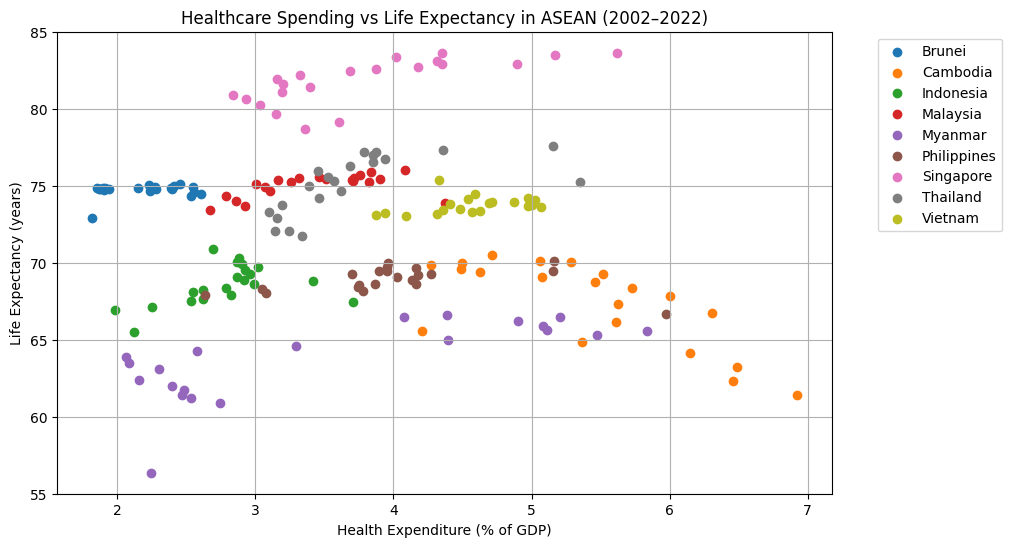

In [50]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))

# plot one color per country
for country in df_asean["Entity"].unique():
    subset = df_asean[df_asean["Entity"] == country]
    plt.scatter(
        subset["Current health expenditure (CHE) as percentage of gross domestic product (GDP) (%)"],
        subset["Period life expectancy at birth"],
        label=country
    )

plt.xlabel("Health Expenditure (% of GDP)")
plt.ylabel("Life Expectancy (years)")
plt.title("Healthcare Spending vs Life Expectancy in ASEAN (2002–2022)")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()



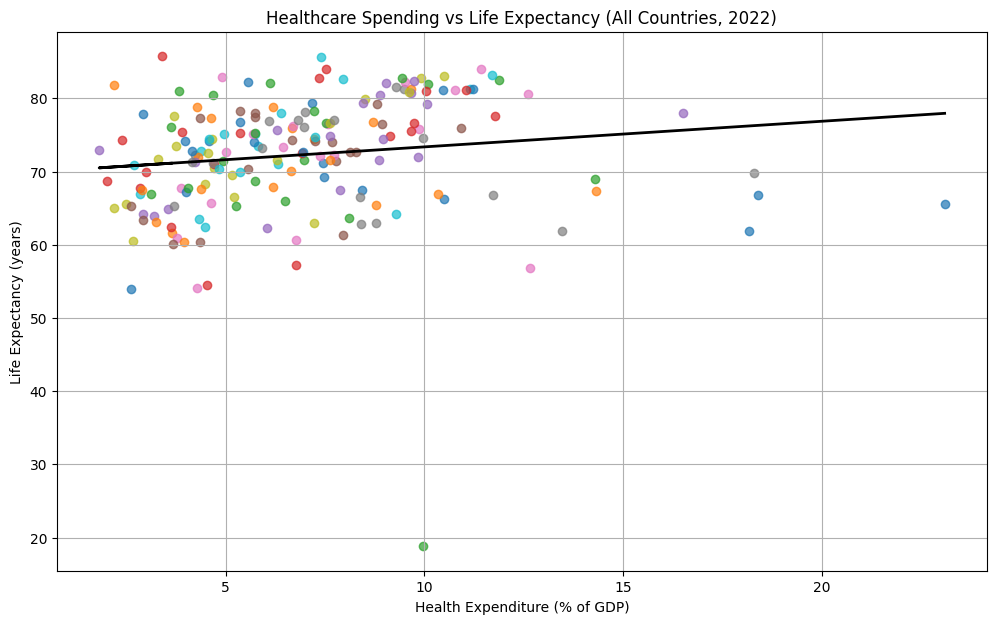

In [51]:
import numpy as np
import matplotlib.pyplot as plt

# filter to year 2022 only
df_2022 = df[df["Year"] == 2022].copy()

plt.figure(figsize=(12, 7))

# scatter plot: each country = one color
countries = df_2022["Entity"].unique()

for country in countries:
    subset = df_2022[df_2022["Entity"] == country]
    plt.scatter(
        subset["Current health expenditure (CHE) as percentage of gross domestic product (GDP) (%)"],
        subset["Period life expectancy at birth"],
        alpha=0.7
    )

# ---------------- GLOBAL TRENDLINE ----------------
x = df_2022["Current health expenditure (CHE) as percentage of gross domestic product (GDP) (%)"]
y = df_2022["Period life expectancy at birth"]

# linear regression line
m, b = np.polyfit(x, y, 1)

plt.plot(x, m*x + b, color="black", linewidth=2)
# ---------------------------------------------------

plt.xlabel("Health Expenditure (% of GDP)")
plt.ylabel("Life Expectancy (years)")
plt.title("Healthcare Spending vs Life Expectancy (All Countries, 2022)")

plt.grid(True)
plt.show()



In [52]:
df_2022[df_2022["Period life expectancy at birth"] == df_2022["Period life expectancy at birth"].min()]


,Entity,Code,Year,Period life expectancy at birth,Current health expenditure (CHE) as percentage of gross domestic product (GDP) (%)
692,Central African Republic,CAF,2022,18.8177,9.95509


In [53]:
df_2022_clean = df_2022[df_2022["Entity"] != "Central African Republic"].copy()


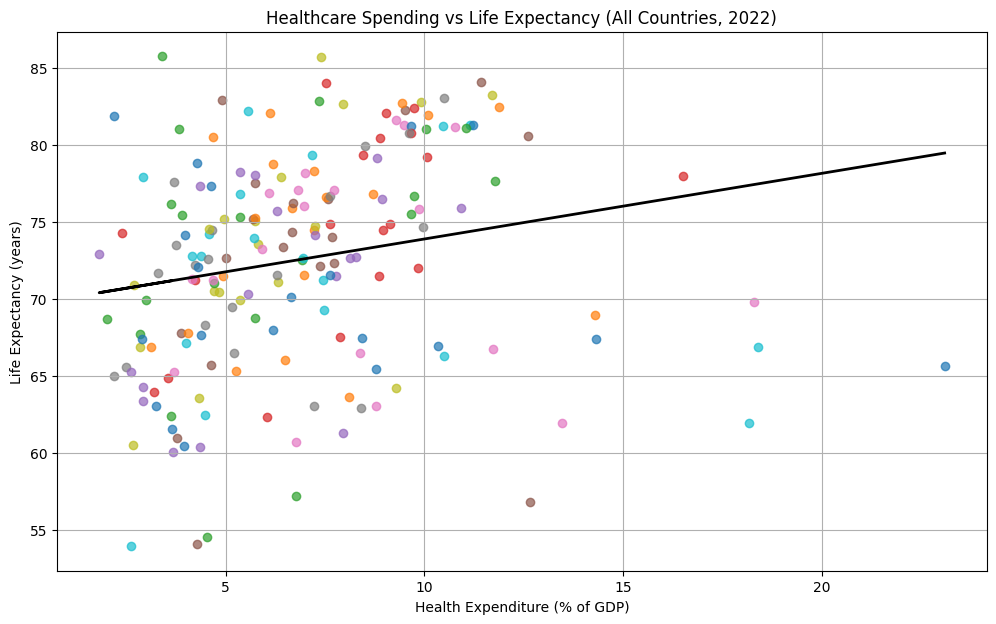

In [54]:
plt.figure(figsize=(12, 7))

for country in df_2022_clean["Entity"].unique():
    subset = df_2022_clean[df_2022_clean["Entity"] == country]
    plt.scatter(
        subset["Current health expenditure (CHE) as percentage of gross domestic product (GDP) (%)"],
        subset["Period life expectancy at birth"],
        alpha=0.7
    )

# trendline
x = df_2022_clean["Current health expenditure (CHE) as percentage of gross domestic product (GDP) (%)"]
y = df_2022_clean["Period life expectancy at birth"]

m, b = np.polyfit(x, y, 1)
plt.plot(x, m*x + b, color="black", linewidth=2)

plt.xlabel("Health Expenditure (% of GDP)")
plt.ylabel("Life Expectancy (years)")
plt.title("Healthcare Spending vs Life Expectancy (All Countries, 2022)")
plt.grid(True)
plt.show()


The chart shows a weak positive correlation between healthcare spending and life expectancy. While higher spending is generally associated with longer lives, the relationship is not strong. Countries with similar spending levels often have very different outcomes, indicating that other factors—such as income, environment, education, and health system efficiency—play a significant role. Health expenditure alone does not fully determine life expectancy.

In [55]:
df_2022.sort_values(
    by="Current health expenditure (CHE) as percentage of gross domestic product (GDP) (%)",
    ascending=False
).head(5)


,Entity,Code,Year,Period life expectancy at birth,Current health expenditure (CHE) as percentage of gross domestic product (GDP) (%)
20,Afghanistan,AFG,2022,65.6170,23.08817
3763,Tuvalu,TUV,2022,66.8516,18.38210
2676,Niue,NIU,2022,69.8182,18.28817
2529,Nauru,NRU,2022,61.9304,18.17031
3867,United States,USA,2022,77.9789,16.49614


In [56]:
df_2022.sort_values(
    by="Period life expectancy at birth",
    ascending=False
).head(5)


,Entity,Code,Year,Period life expectancy at birth,Current health expenditure (CHE) as percentage of gross domestic product (GDP) (%)
2391,Monaco,MCO,2022,85.7464,3.39780
3138,San Marino,SMR,2022,85.7082,7.40650
1824,Japan,JPN,2022,84.0541,11.42184
83,Andorra,AND,2022,84.0164,7.53679
3532,Switzerland,CHE,2022,83.2003,11.70653


In [57]:
df_2022[[
    "Current health expenditure (CHE) as percentage of gross domestic product (GDP) (%)",
    "Period life expectancy at birth"
]].describe()


,Current health expenditure (CHE) as percentage of gross domestic product (GDP) (%),Period life expectancy at birth
count,194.000000,194.000000
mean,6.937094,72.290343
std,3.360449,7.953179
min,1.817680,18.817700
25%,4.386818,67.380475
50%,6.578065,72.853450
75%,8.838537,77.619650
max,23.088170,85.746400


In [58]:
df_2022.sort_values(
    by="Current health expenditure (CHE) as percentage of gross domestic product (GDP) (%)",
    ascending=True
).head(5)


,Entity,Code,Year,Period life expectancy at birth,Current health expenditure (CHE) as percentage of gross domestic product (GDP) (%)
524,Brunei,BRN,2022,72.9171,1.81768
1971,Laos,LAO,2022,68.7152,2.01825
2970,Qatar,QAT,2022,81.8566,2.18112
818,Congo,COG,2022,65.0003,2.19225
293,Bangladesh,BGD,2022,74.2647,2.39039
